In [16]:
import meitner
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
id = 'Au 4f 655'
x = meitner.Pes.from_vamas('au3-0001.pxt.vms', region_id=id, normalize=True, n_peaks=2, dict_keys=['Au'])

Excitation energy:
655.0 eV


In [18]:
x.generate_params(be_guess=[83,87])

name,value,initial value,min,max,vary,expression
data_Au_p0_amplitude,1.50000000,1.5,0.00000000,inf,True,
data_Au_p0_center,83.0000000,83,79.0000000,93.0000000,True,
data_Au_p0_sigma,1.00000000,1,0.00000000,inf,True,
data_Au_p0_gamma,1.00000000,1,0.00000000,inf,True,
data_Au_p0_gfwhm,2.00000000,None,-inf,inf,False,2*data_Au_p0_sigma
data_Au_p0_lfwhm,2.00000000,None,-inf,inf,False,2*data_Au_p0_gamma
data_Au_p0_glmix,0.50000000,None,0.00000000,1.00000000,False,data_Au_p0_lfwhm/(data_Au_p0_lfwhm+data_Au_p0_gfwhm)
data_Au_p0_fwhm,3.00000000,None,0.00000000,3.00000000,False,"calc_voigt_fwhm(data_Au_p0_sigma,data_Au_p0_gamma)"
data_Au_p1_amplitude,1.50000000,1.5,0.00000000,inf,True,
data_Au_p1_center,87.0000000,87,79.0000000,93.0000000,True,


In [19]:
x.fit_data()

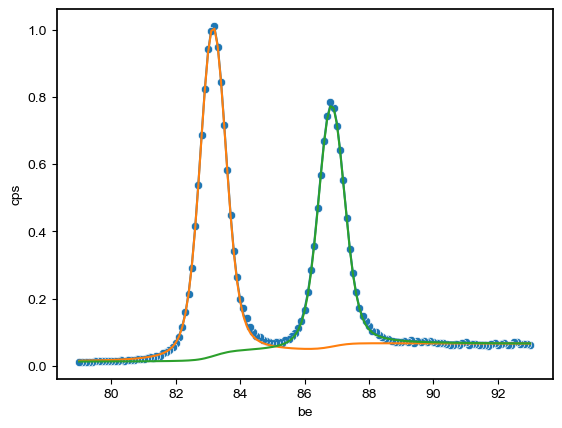

In [20]:
df = x.df_dict['Au']
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='be', y='cps', ax=ax)
sns.lineplot(data=df, x='be', y='fit', ax=ax)
for p in ['p0', 'p1']:
    sns.lineplot(data=df, x='be', y=p, ax=ax)

False


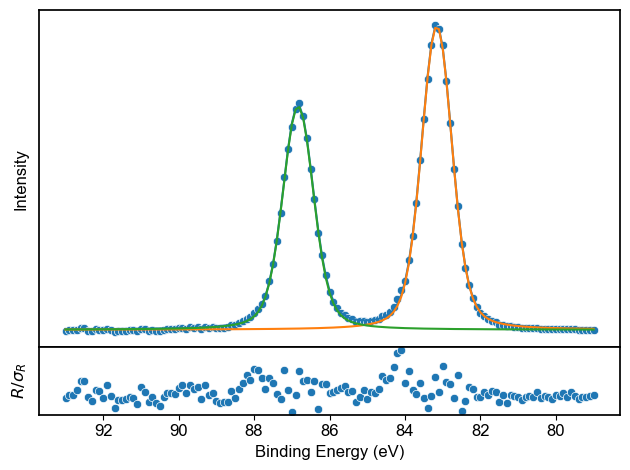

In [21]:
x.plot_result()

In [22]:
df['std_residuals']

0     -0.960381
1     -0.688707
2     -0.670226
3     -0.207283
4      0.690838
         ...   
136   -1.048804
137   -0.848942
138   -0.891421
139   -0.798854
140   -0.733430
Name: std_residuals, Length: 141, dtype: float64

In [23]:
np.std(df['residuals'])

3.283563527280196e-08